### Concept

The initial concept behind this addressing system uses equilateral triangles. Lets create one now.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import string
import sys

sys.path.append(r'/mnt/c/github.com/data-navigator/dggs-package/DGGS/cell')
from triangle import Triangle

[[0, 0], [0.5, 1], [1, 0]]


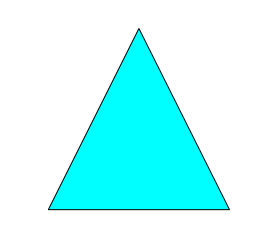

In [2]:
t = Triangle(1, 'A', [[0,0],[0.5,1],[1,0]], 'cyan')
print(t.vertices)

fig0 = plt.figure() 
ax0 = fig0.add_subplot(111, aspect='equal') 
ax0.add_patch(t.patch) 
ax0.set_xlim((-0.1,1.1)) 
ax0.set_ylim((-0.1,1.1)) 
plt.axis('off')
plt.show()

We can tessellate the triangle to form the net of an icosahedron.

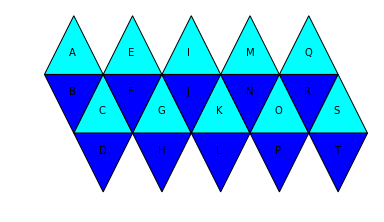

In [15]:
import string

vertices= [
    [[0,0],[0.5,1],[1,0]],
    [[0,0],[0.5,-1],[1,0]],
    [[0.5,-1],[1.5,-1],[1,0]],
    [[0.5,-1],[1,-2],[1.5,-1]],
    [[1,0],[1.5,1],[2,0]],
    [[1,0],[1.5,-1],[2,0]],
    [[1.5,-1],[2.5,-1],[2,0]],
    [[1.5,-1],[2,-2],[2.5,-1]],
    [[2,0],[2.5,1],[3,0]],
    [[2,0],[2.5,-1],[3,0]],
    [[2.5,-1],[3.5,-1],[3,0]],
    [[2.5,-1],[3,-2],[3.5,-1]],
    [[3,0],[3.5,1],[4,0]],
    [[3,0],[3.5,-1],[4,0]],
    [[3.5,-1],[4.5,-1],[4,0]],
    [[3.5,-1],[4,-2],[4.5,-1]],
    [[4,0],[4.5,1],[5,0]],
    [[4,0],[4.5,-1],[5,0]],
    [[4.5,-1],[5.5,-1],[5,0]],
    [[4.5,-1],[5,-2],[5.5,-1]],
]

fig1 = plt.figure() 
ax1 = fig1.add_subplot(111, aspect='equal') 
ax1.set_xlim((-0.1,5.6)) 
ax1.set_ylim((-2.1,1.1)) 

for i, v in enumerate(vertices):
    c = 'cyan' if i%2 is 0 else 'blue'
    t = Triangle(i, string.ascii_uppercase[i], v, c)
    ax1.add_patch(t.patch)
    ax1.annotate(t.address,
                 xy=t.centroid,
                 xytext=(t.centroid[0] - 0.075, t.centroid[1]),
                 horizontalalignment='left')

plt.axis('off')
plt.show()

We now have twenty triangles, equal to the number of faces on an Icosahedron. Each triangle can be equally subdivided into 9 smaller triangles. This forms the basis of the addressing grid.

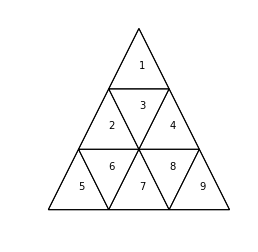

In [51]:
t2 = Triangle(1, 'A', [(0,0),(0.5,1),(1,0)])
tess_class_two = t2.tessellate()

fig3 = plt.figure() 
ax3 = fig3.add_subplot(111, aspect='equal') 
ax3.add_patch(t2.patch) 

for _ in tess_class_two:
    ax3.add_patch(_.patch) 
    ax3.annotate(_.oid, xy=_.centroid)

ax3.set_xlim((-0.1,1.1)) 
ax3.set_ylim((-0.1,1.1)) 

plt.axis('off')
plt.show()

A grid of 20 initial equilateral triangles, tiling fractally into 9-triangle subdivisions is the key concept of a Discrete Global Grid System of addressed cells. Each initial cell with a letter ID can then subdivide, giving each subcell a unique address by appending a second ID number/letter to the string based on its location in the tiling. This can continue indefinitely, leading to many triangles within triangles that will continuously refine into a higher resolution grid of addresses. 

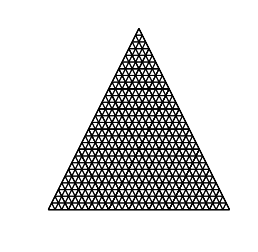

In [47]:
t3 = Triangle(1, 'A', [(0,0),(0.5,1),(1,0)])
tess = t3.tessellate()

fig4 = plt.figure() 
ax4 = fig4.add_subplot(111, aspect='equal') 
ax4.add_patch(t3.patch) 

for a in tess:
    ax4.add_patch(a.patch)
    for b in a.tessellate():
        ax4.add_patch(b.patch)
        for c in b.tessellate():
            ax4.add_patch(c.patch)
            

ax4.set_xlim((-0.1,1.1)) 
ax4.set_ylim((-0.1,1.1)) 

plt.axis('off')
plt.show()

As we can see in the above image, this tiling process creates a triangluar grid, covering the full area of the main triangle. In a cartesian grid, the location of a point is given by a coordinate pair. In a discrete triangular grid it is given by the address of the cell which contains the point (to a given level of precision). The triangular cell is therefore part of the grid itself, instead of existing 'on' the grid as with cartesian points. The numbers 1-9 are used in cell addresses, so 0 is left to be used signify precision. For example requesting cells with the address 'A3' will return all the triangles with "A3" as the first 2 characters in their address. Requesting 'A310' returns a finer subset with "A31" as the first 3 characters and the underlying 4-character addressed cells as well. Therefore 'A90000' would return all cells to 5 subdivisions of precision within cells within "A9". A single cell can be addressed without a trailing 0 - such as 'A124'. Groups can be a list for now ie: ['A62', 'A63', 'A64']. Since the triangular cells are conceptually similar points, groups of them can also form similar structures to 'lines' and 'polygons'. Special notation will be developed to deal with ranges in these cases. 

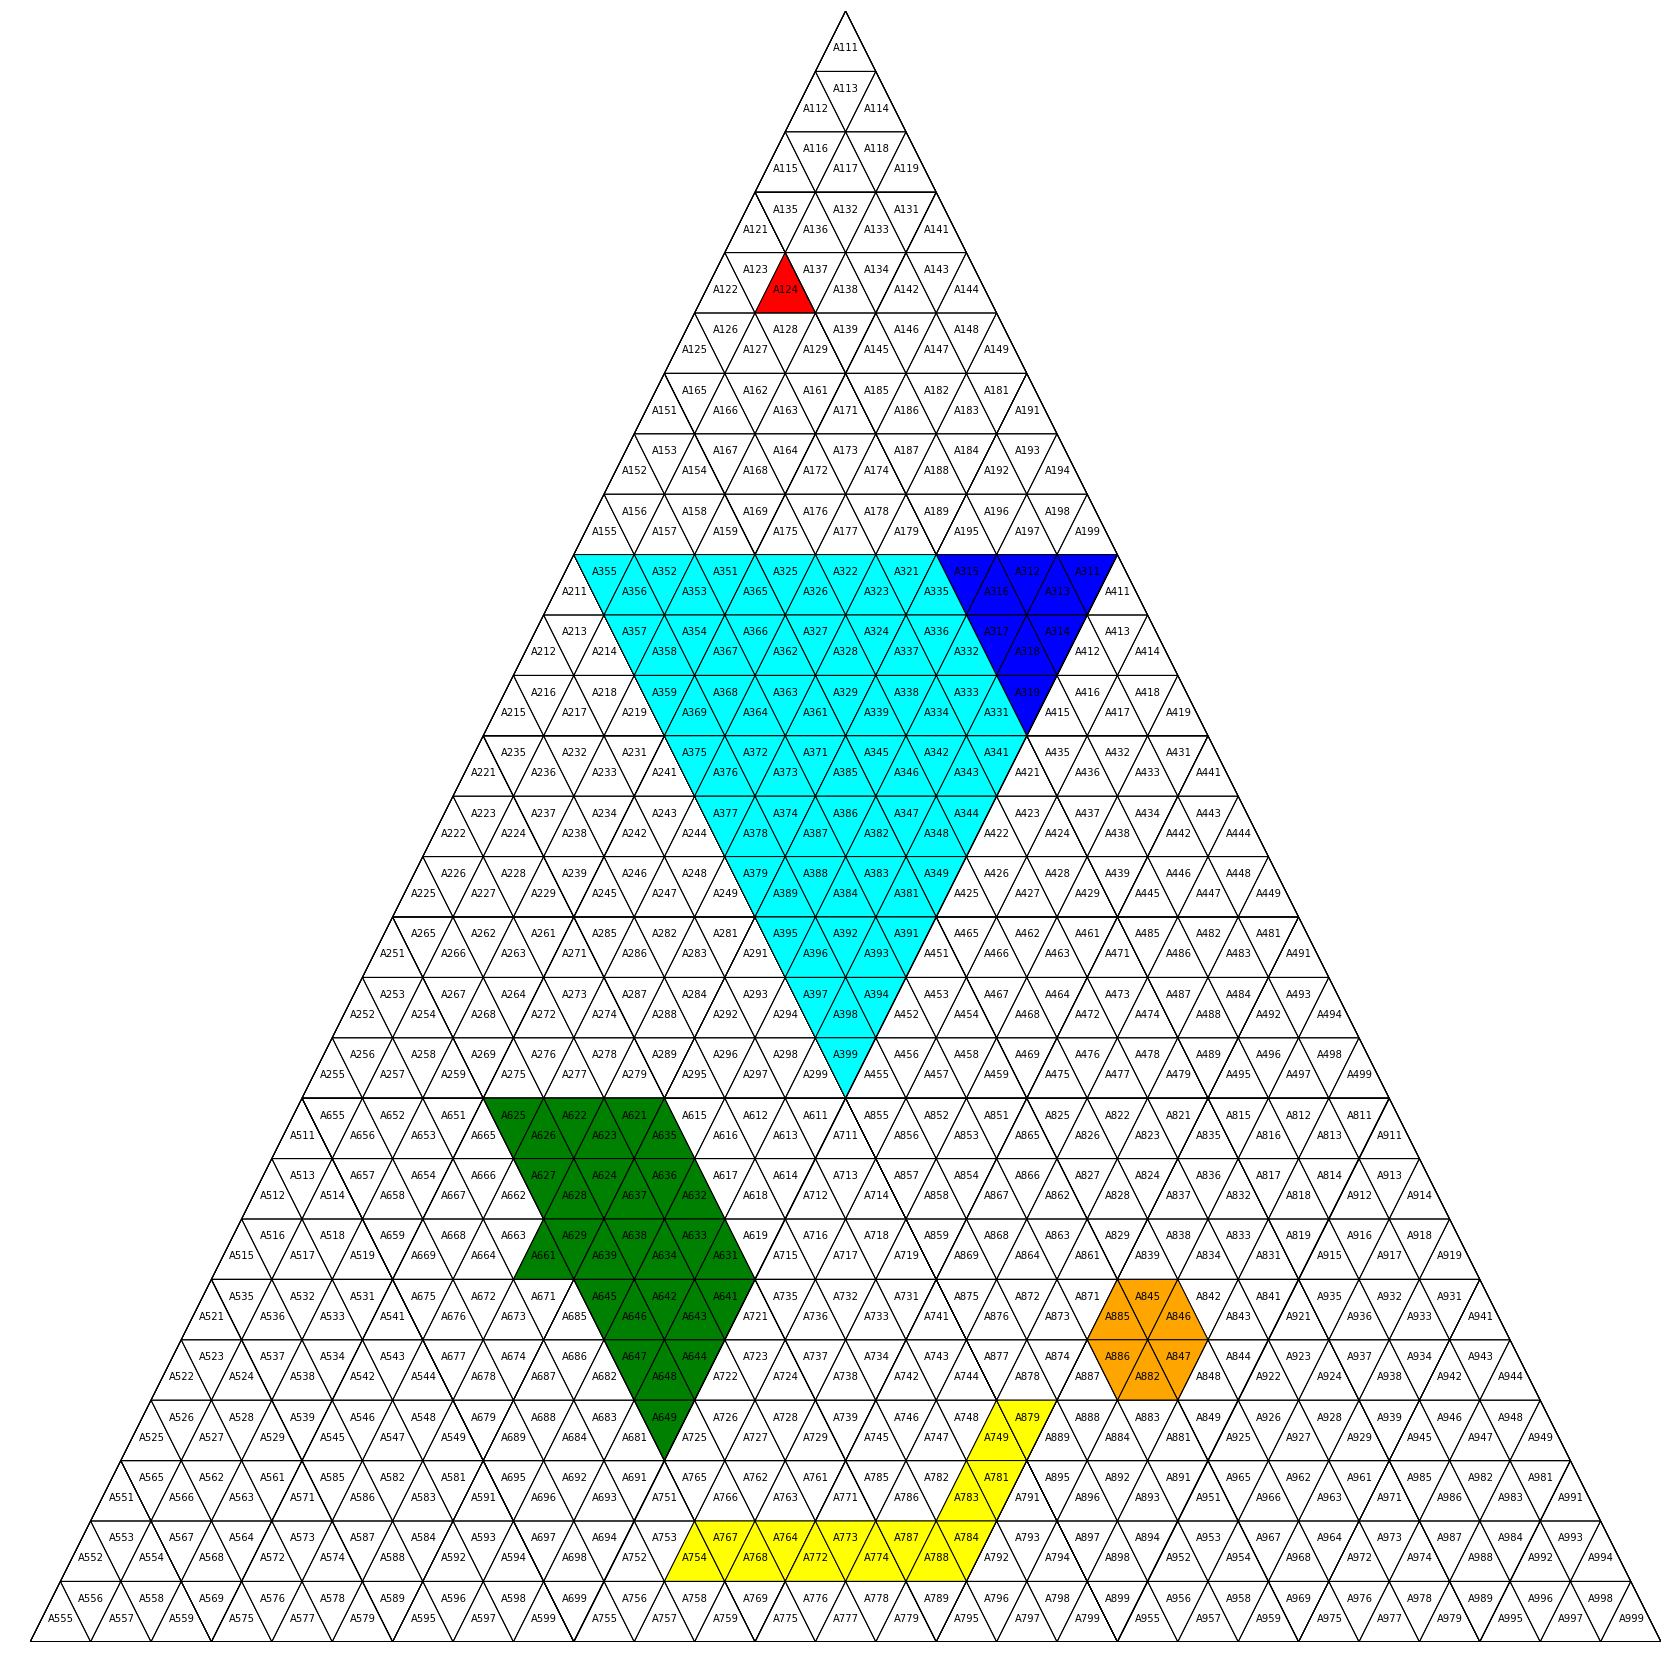

In [50]:
t4 = Triangle(1, 'A', [(0,0),(0.5,1),(1,0)])
tess = t4.tessellate()

fig5 = plt.figure(figsize=(30,30))
ax5 = fig5.add_subplot(111, aspect='equal') 
ax5.add_patch(t4.patch) 

for a in tess:
    ax5.add_patch(a.patch)
    for b in a.tessellate():
        ax5.add_patch(b.patch)
        for c in b.tessellate():
            group = ['A62', 'A63', 'A64', 'A661']
            hexagon = ['A885', 'A845', 'A846', 'A847', 'A882', 'A886']
            line = ['A764', 'A768', 'A767', 'A754', 'A772', 'A773',
                    'A774', 'A787', 'A788', 'A784', 'A783', 'A781',
                    'A749', 'A879']
            if any(map(lambda address: address in c.address, group)):
                c.patch_color = 'green'
            if any(map(lambda address: address in c.address, hexagon)):
                c.patch_color = 'orange'
            if any(map(lambda address: address in c.address, line)):
                c.patch_color = 'yellow'
            if 'A3' in c.address:
                c.patch_color = 'cyan'
            if 'A31' in c.address:
                c.patch_color = 'blue'
            if 'A124' in c.address:
                c.patch_color = 'red'
            ax5.annotate(c.address,
                         xy=c.centroid,
                         xytext=(c.centroid[0] - 0.0075, c.centroid[1]),
                         horizontalalignment='left')
            ax5.add_patch(c.patch)

ax5.set_xlim((0,1)) 
ax5.set_ylim((0,1)) 

plt.axis('off')
plt.show()

With reliable locations of cell addresses we can form algorithms to traverse cells from one address to another. 